# Fitting post processing

In this notebook it is demonstrated how to work with the result file generated by the fitter

Diagnostic plotting is shown, as well as the construction of deviation plots, and so on

General notes:
    
* To keep the approach flexible, each of the plotting routines assumes that an axis is already prepared for plotting. This allows you to make complex grids of axes and plot different things (different model results) in each axis.

In [1]:
import os
import matplotlib.pyplot as plt
from temo.analyze.plotting import ModelAssessmentPlotter, PairMinFilter
# Files in this folder, make sure we have the desired fitting result file
os.listdir()

['index.rst',
 'FittingPostProcessingPlotting.ipynb',
 '.ipynb_checkpoints',
 'runc709530e-e431-11ed-b7b3-8e94f88bf11a.tar.xz']

In [2]:
mapp = ModelAssessmentPlotter(
    'runc709530e-e431-11ed-b7b3-8e94f88bf11a.tar.xz',
    result_filter=PairMinFilter(['R32',"R1234YF"])
)

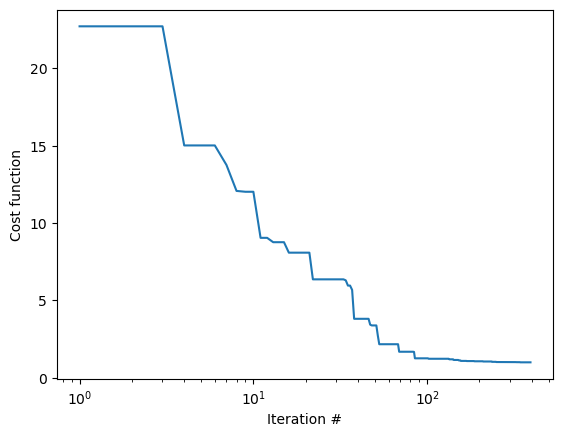

In [3]:
# First thing to make sure the run is converged,
# at least approximately, so we plot the cost function 
# history
fig, ax = plt.subplots()
comps = [0.3, 0.7]
mapp.plot_cost_history(ax=ax, stepfiles=mapp.stepfiles)

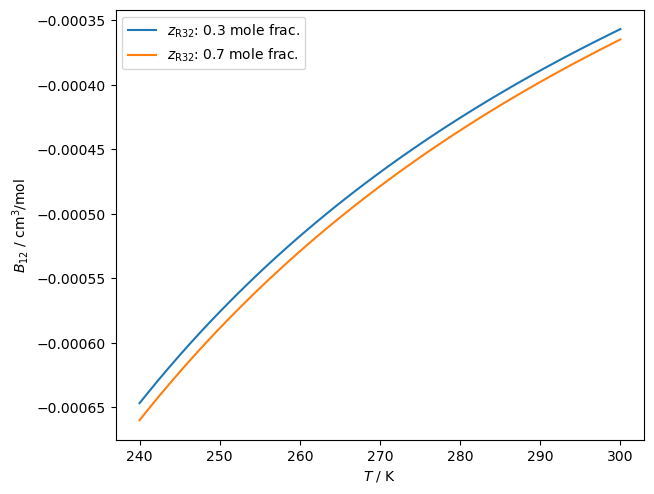

In [4]:
# Next we plot the B12 for two compositions, to make sure
# that they are close to the same
fig, ax = plt.subplots()
comps = [0.3, 0.7]
mapp.plot_B12(ax=ax, z1_comps=comps, Trange=(240, 300), 
              labels=[rf'$z_{{\rm R32}}$: {z} mole frac.' for z in comps])
# <USER>
# And you could add experimental data points here...
# </USER>
plt.tight_layout(pad=0.2)

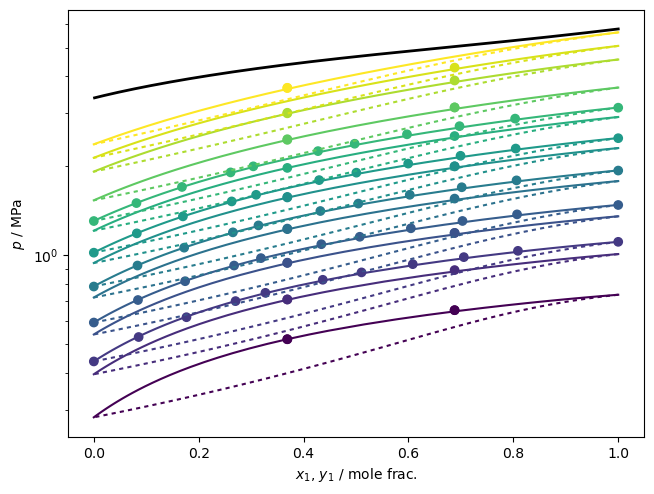

In [5]:
# A pretty colored p-x diagram
fig, ax = plt.subplots()
comps = [0.3, 0.7]
# First plot the points from the fitting data file
# Note: you can pass keyword arguments to the 
# read_csv function here if needed
df = mapp.results.get_df_VLE(sep=',') 
sc = ax.scatter(x=df['x_1 / mole frac.'], y=df['p / kPa']/1e3, c=df['T / K'])
# Then plot the corresponding isotherms with matching color scheme
ipure = 0
mapp.plot_binary_VLE_isotherms(
    ax=ax, Tvec=set(df['T / K']), cmap=sc, 
    ipure=ipure, basemodel=mapp.basemodels[ipure]
)
# And the critical locus too for good measure
mapp.plot_binary_critical_locus(
    ax=ax, ipure=ipure, kind='XP', 
    options={'rel_err': 1e-10}, 
    plot_kwargs={'color': 'k', 'lw': 2}
)
plt.tight_layout(pad=0.2)
plt.show()